In [1]:
#find all shares that are included in DJI
#download time series
#build a correlation matrix
#find the biggest clicka
#visualize data


In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas_datareader.data as web
import datetime

In [70]:
path='https://finance.yahoo.com/quote/%5EDJI/components?p=%5EDJI'
DJI=pd.read_html(path)[0][['Symbol', 'Company Name']]
DJI

,Symbol,Company Name
0,PFE,Pfizer Inc.
1,INTC,Intel Corporation
2,MRK,"Merck & Co., Inc."
3,GS,"The Goldman Sachs Group, Inc."
4,JNJ,Johnson & Johnson
5,CAT,Caterpillar Inc.
6,KO,The Coca-Cola Company
7,PG,The Procter & Gamble Company
8,JPM,JPMorgan Chase & Co.
9,MMM,3M Company


In [71]:
ticker_dji=DJI['Symbol'].values
ticker_dji

array(['PFE', 'INTC', 'MRK', 'GS', 'JNJ', 'CAT', 'KO', 'PG', 'JPM', 'MMM',
       'VZ', 'CSCO', 'TRV', 'V', 'HD', 'DIS', 'BA', 'NKE', 'MSFT', 'DWDP',
       'AAPL', 'CVX', 'IBM', 'AXP', 'XOM', 'MCD', 'UNH', 'WMT', 'UTX',
       'WBA'], dtype=object)

In [72]:
start_time=datetime.datetime(2017,1,1)
finish_time=datetime.datetime(2017,12,31)
#web.DataReader('IBM', 'yahoo', start_time, finish_time)['Close']
web_archiv={ }
for i in ticker_dji:
    web_archiv[i]=web.DataReader(i, 'yahoo', start_time, finish_time)['Close']
web_archiv

{'PFE': Date
 2017-01-03    33.000000
 2017-01-04    33.290001
 2017-01-05    33.610001
 2017-01-06    33.480000
 2017-01-09    33.470001
 2017-01-10    33.439999
 2017-01-11    32.830002
 2017-01-12    32.599998
 2017-01-13    32.520000
 2017-01-17    32.060001
 2017-01-18    32.029999
 2017-01-19    31.700001
 2017-01-20    31.770000
 2017-01-23    31.459999
 2017-01-24    31.150000
 2017-01-25    31.290001
 2017-01-26    31.280001
 2017-01-27    31.420000
 2017-01-30    31.309999
 2017-01-31    31.730000
 2017-02-01    31.670000
 2017-02-02    31.730000
 2017-02-03    32.090000
 2017-02-06    32.230000
 2017-02-07    32.080002
 2017-02-08    32.139999
 2017-02-09    32.380001
 2017-02-10    32.349998
 2017-02-13    32.610001
 2017-02-14    32.750000
                 ...    
 2017-11-16    35.560001
 2017-11-17    35.369999
 2017-11-20    35.349998
 2017-11-21    35.540001
 2017-11-22    35.430000
 2017-11-24    35.490002
 2017-11-27    35.490002
 2017-11-28    35.849998
 2017-11-29 

In [73]:
pd.DataFrame(web_archiv).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2017-01-03 to 2017-12-29
Data columns (total 30 columns):
PFE     251 non-null float64
INTC    251 non-null float64
MRK     251 non-null float64
GS      251 non-null float64
JNJ     251 non-null float64
CAT     251 non-null float64
KO      251 non-null float64
PG      251 non-null float64
JPM     251 non-null float64
MMM     251 non-null float64
VZ      251 non-null float64
CSCO    251 non-null float64
TRV     251 non-null float64
V       251 non-null float64
HD      251 non-null float64
DIS     251 non-null float64
BA      251 non-null float64
NKE     251 non-null float64
MSFT    251 non-null float64
DWDP    251 non-null float64
AAPL    251 non-null float64
CVX     251 non-null float64
IBM     251 non-null float64
AXP     251 non-null float64
XOM     251 non-null float64
MCD     251 non-null float64
UNH     251 non-null float64
WMT     251 non-null float64
UTX     251 non-null float64
WBA     251 non-null float64
dtypes

In [74]:
df=pd.DataFrame(web_archiv)
df_corr=df.corr()
df_corr

,PFE,INTC,MRK,GS,JNJ,CAT,KO,PG,JPM,MMM,...,AAPL,CVX,IBM,AXP,XOM,MCD,UNH,WMT,UTX,WBA
PFE,1.000000,0.677839,-0.420867,0.546965,0.709913,0.764662,0.506368,0.470191,0.830698,0.744824,...,0.643206,0.651978,-0.258071,0.813660,0.021103,0.616180,0.726065,0.711595,0.306522,-0.658259
INTC,0.677839,1.000000,-0.846313,0.607724,0.559807,0.826488,0.425264,0.031416,0.802759,0.728106,...,0.637371,0.756107,-0.186566,0.805144,0.305433,0.585838,0.727079,0.819969,0.354967,-0.773775
MRK,-0.420867,-0.846313,1.000000,-0.407597,-0.454983,-0.669132,-0.325183,0.159559,-0.655854,-0.619071,...,-0.525966,-0.523692,0.198371,-0.660859,-0.264650,-0.495612,-0.635230,-0.727349,-0.333266,0.655920
GS,0.546965,0.607724,-0.407597,1.000000,0.116486,0.396113,-0.160593,0.112664,0.653395,0.241712,...,0.083271,0.767724,0.380604,0.463248,0.490774,0.041017,0.259755,0.306365,-0.018738,-0.342052
JNJ,0.709913,0.559807,-0.454983,0.116486,1.000000,0.835928,0.890482,0.378629,0.760187,0.946110,...,0.883185,0.278877,-0.671870,0.852504,-0.312055,0.931374,0.910574,0.855269,0.690988,-0.758278
CAT,0.764662,0.826488,-0.669132,0.396113,0.835928,1.000000,0.778598,0.326914,0.904749,0.921695,...,0.846973,0.665675,-0.593498,0.970168,-0.069928,0.898742,0.960189,0.942597,0.574909,-0.843323
KO,0.506368,0.425264,-0.325183,-0.160593,0.890482,0.778598,1.000000,0.376603,0.562108,0.843105,...,0.853889,0.181273,-0.870806,0.735716,-0.433528,0.942193,0.857578,0.782659,0.636390,-0.664102
PG,0.470191,0.031416,0.159559,0.112664,0.378629,0.326914,0.376603,1.000000,0.345358,0.264884,...,0.404513,0.201912,-0.248412,0.361232,-0.566424,0.328032,0.354025,0.258709,-0.051325,-0.058712
JPM,0.830698,0.802759,-0.655854,0.653395,0.760187,0.904749,0.562108,0.345358,1.000000,0.841742,...,0.720878,0.703425,-0.334110,0.952631,0.024829,0.741710,0.871847,0.843875,0.489908,-0.772621
MMM,0.744824,0.728106,-0.619071,0.241712,0.946110,0.921695,0.843105,0.264884,0.841742,1.000000,...,0.889825,0.428168,-0.625330,0.924790,-0.153791,0.940364,0.954431,0.937787,0.710712,-0.825000


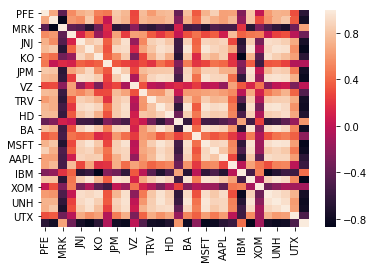

In [75]:
sns.heatmap(df_corr)

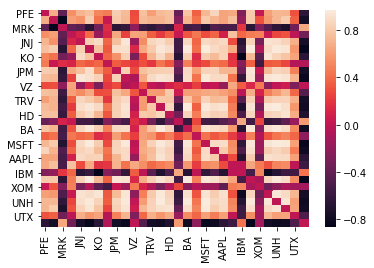

In [76]:
df1=df_corr.replace(1,0)
sns.heatmap(df1)

In [77]:
df2=(abs(df1)>0.8).astype(int)
df2


,PFE,INTC,MRK,GS,JNJ,CAT,KO,PG,JPM,MMM,...,AAPL,CVX,IBM,AXP,XOM,MCD,UNH,WMT,UTX,WBA
PFE,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
INTC,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
MRK,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JNJ,0,0,0,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,1,0,0
CAT,0,1,0,0,1,0,0,0,1,1,...,1,0,0,1,0,1,1,1,0,1
KO,0,0,0,0,1,0,0,0,0,1,...,1,0,1,0,0,1,1,0,0,0
PG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JPM,1,1,0,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,1,0,0
MMM,0,0,0,0,1,1,1,0,1,0,...,1,0,0,1,0,1,1,1,0,1


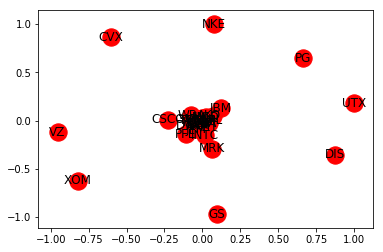

In [87]:
m=df2.values
n=ticker_dji
G=nx.from_numpy_matrix(m)
nodes=dict(zip(G.nodes(),n))
G1=nx.relabel_nodes(G, nodes)
nx.draw_networkx(G1, pos=)